In [2]:
# !python
# -*- coding: utf-8 -*

__author__ = 'Erling Ween Eriksen'
__email__ = 'erlinge@nmbu.no'

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ME4 = pd.read_csv(r'ME_4.csv', names=['M', 'E']).astype({'M': 'float32','E': 'float32'})

In [3]:
kb = 1.380649 * 10 ** (-23)
J = 1
T = 1 * (J / kb)
beta = 1/(T*kb)
Ns = 2*2

Z = 12 + 4*np.cosh(8*beta)
E_ana = -32*np.sinh(8*beta)/(Z*Ns)
E2_ana = 2*128*np.cosh(8*beta)/(Z*Ns)#Added factor of 2 to E2_ana
M_ana = (16 + 8*np.exp(8*beta))/(Z*Ns)
M2_ana = (32 + 32*np.exp(8*beta))/(Z*Ns)
C_ana = 1/(Ns*kb*T*T) * (E2_ana*Ns - (E_ana*Ns)**2) 
X_ana = 1/(Ns*kb*T) * (M2_ana*Ns - (abs(M_ana)*Ns)**2)

In [4]:
N_spins=2*2

n_iter = len(ME4.index)
burnin = 20000
plot_n = n_iter-1
plot_range = np.arange(burnin, plot_n)
div_range = np.arange(0, plot_n-burnin)

E = ME4.E.values[plot_range]
M = abs(ME4.M.values[plot_range])

e = E /N_spins
m = M /N_spins

E2 = E**2
M2 = M**2


e_exp = np.cumsum(e) / (div_range + 1)
e2_exp = (np.cumsum(E2) / (div_range +1))/N_spins

m_exp = np.cumsum(m) / (div_range + 1)
m2_exp = (np.cumsum(M2) / (div_range +1))/N_spins

E_exp = np.cumsum(E) / (div_range + 1)
E2_exp = (np.cumsum(E2) / (div_range +1))

M_exp = np.cumsum(M) / (div_range + 1)
M2_exp = (np.cumsum(M2) / (div_range+1))

C_exp = 1/(N_spins*kb*T*T) * (E2_exp - (E_exp)**2) 
X_exp = 1/(N_spins*kb*T) * (M2_exp - (abs(M_exp))**2)

In [14]:
print(f'Z: {Z}\n')
print(f' E_ana: {E_ana}, E_MC: {e_exp.mean()}')
print(f' E2_ana: {E2_ana}, E2_MC: {e2_exp.mean()}\n')

print(f' M_ana: {M_ana}, M_MC: {m_exp.mean()}')
print(f' M2_ana: {M2_ana}, M2_MC: {m2_exp.mean()}\n')

print(f' C_ana: {C_ana}, C_MC: {C_exp.mean()}')
print(f' X_ana: {X_ana}, X_MC: {X_exp.mean()}')

Z: 5973.916645008712

 E_ana: -1.99598208593669, E_MC: -1.996121316893906
 E2_ana: 15.967860281385008, E2_MC: 15.968970535151248

 M_ana: 0.9986607327485997, M_MC: 0.9987184334221495
 M2_ana: 3.993303776052107, M2_MC: 3.993558183738205

 C_ana: 4.429443940609736e-25, C_MC: 4.275731405373804e-25
 X_ana: 0.004010739516226991, X_MC: 0.0038041157561655337


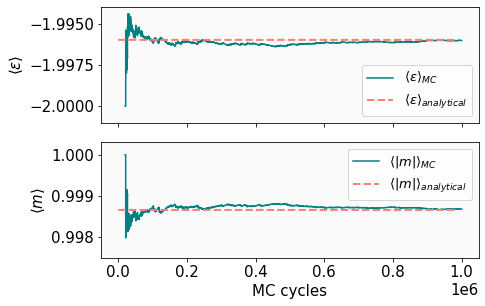

In [13]:
fig, axs = plt.subplots(2, sharex=True)
fig.set_figheight(4.5)
fig.set_figwidth(7)
axs[0].plot(plot_range,e_exp, color='teal', label= r'$\langle \epsilon \rangle _{MC}$')
axs[0].plot([E_ana for i in plot_range], label=r'$\langle \epsilon \rangle _{analytical}$', 
            color='salmon', linestyle = 'dashed', linewidth = 2)

axs[1].plot(plot_range,m_exp, color='teal', label= r'$\langle |m| \rangle_{MC} $')
axs[1].plot([M_ana for i in plot_range], label=r'$\langle |m| \rangle _{analytical}$', 
            color='salmon', linestyle = 'dashed', linewidth = 2)

plt.xlabel('MC cycles')
axs[0].set(ylabel=r'$\langle \epsilon \rangle$', ylim=(-2.001, -1.994))
axs[1].set(ylabel=r'$\langle m \rangle$', ylim=(0.9975, 1.0003))

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
#plt.rc('legend',fontsize=12)
plt.rc('legend', fontsize=13)

axs[0].set_facecolor((0.98, 0.98, 0.98))
axs[1].set_facecolor((0.98, 0.98, 0.98))
    
axs[0].legend(loc='lower right')
axs[1].legend(loc='upper right')
plt.tight_layout()
plt.savefig('prob4_e_and_m.pdf')
plt.show()

In [ ]:
fig, axs = plt.subplots(2, sharex=True)
fig.set_figheight(4.5)
fig.set_figwidth(7)

axs[0].plot(e2_exp, color='teal', label= r'$\langle \epsilon^{2} \rangle _{MC}$')
axs[0].plot([E2_ana for i in plot_range], 
            label=r'$\langle \epsilon^{2} \rangle _{analytical}$', 
            color='salmon', 
            linestyle = 'dashed', 
            linewidth = 2)

axs[1].plot(m2_exp, color='teal', label= r'$\langle m^{2} \rangle_{MC} $')

axs[1].plot([M2_ana for i in plot_range], 
            label=r'$\langle m^{2} \rangle _{analytical}$', 
            color='salmon', 
            linestyle = 'dashed', 
            linewidth = 2)

plt.xlabel('MC cycles')
#axs[0].set(ylabel=r'$\langle \epsilon \rangle$', ylim=(-2.001, -1.994))
#axs[1].set(ylabel=r'$\langle m \rangle$', ylim=(0.9975, 1.0003))

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
#plt.rc('legend',fontsize=12)
plt.rc('legend', fontsize=13)

axs[0].set_facecolor((0.98, 0.98, 0.98))
axs[1].set_facecolor((0.98, 0.98, 0.98))
    
axs[0].legend(loc='lower right')
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.savefig('prob4_E2_and_M2.pdf')
plt.show()

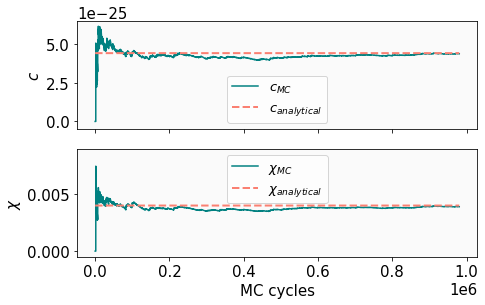

In [12]:
fig, axs = plt.subplots(2, sharex=True)
fig.set_figheight(4.5)
fig.set_figwidth(7)
axs[0].plot(C_exp, color='teal', label= r'$c_{MC}$')
axs[0].plot([C_ana for i in plot_range], label=r'$c _{analytical}$',
            color='salmon', 
            linestyle = 'dashed', 
            linewidth = 2)

axs[1].plot(X_exp, color='teal', label= r'$\chi_{MC} $')
axs[1].plot([X_ana for i in plot_range], label=r'$\chi_{analytical}$', 
            color='salmon', 
            linestyle = 'dashed', 
            linewidth = 2)

plt.xlabel('MC cycles')
axs[0].set(ylabel=r'$c$', ylim=(-0.5*10**(-25), 6.5*10**(-25)))
axs[1].set(ylabel=r'$\chi$', ylim=(-0.0005, 0.009))

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
#plt.rc('legend',fontsize=12)
plt.rc('legend', fontsize=13)

axs[0].set_facecolor((0.98, 0.98, 0.98))
axs[1].set_facecolor((0.98, 0.98, 0.98))
    
axs[0].legend(loc='lower center')
axs[1].legend(loc='upper center')
plt.tight_layout()
plt.savefig('prob4_C_and_X.pdf')
plt.show()